In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: dec-dependent-error.py
"""
Created on Sun May 27 15:28:04 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Plot the smoothed formal error as a function of declination of various catalogs.

"""

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
import numpy as np

# My modules
from my_progs.catalog.read_icrf import read_icrf1, read_icrf2, read_icrf3
from my_progs.catalog.read_gaia import read_dr1_qso, read_dr2_iers
# from my_progs.catalog.smooth_err import smooth_by_dec

Read the information from catalogs.

In [2]:
# ICRF1 catalog
icrf1 = read_icrf1()
icrf1.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])
icrf1 = icrf1.filled()

# ICRF2 catalog
icrf2 = read_icrf2()
icrf2.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])

# ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")
icrf3sx.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])

# ICRF3 K catalog
icrf3k = read_icrf3(wv="k")
icrf3k.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])

# ICRF3 X/Ka catalog
icrf3xka = read_icrf3(wv="xka")
icrf3xka.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])

# Gaia DR1 Quasar auxiliary solution
gdr1 = read_dr1_qso()
gdr1.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])

# Gaia DR2 aux_iers catalog
gdr2 = read_dr2_iers()
gdr2bgt = gdr2[gdr2["phot_g_mean_mag"] < 18.7].filled()
gdr2.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])
gdr2bgt.keep_columns(["dec", "ra_err", "dec_err", "pos_err"])

I bin the radio sources by their declination with a 5-degree interval.

In [3]:
# Bin the data by 5 degree interval

# ICRF1
icrf1_dec_bin = np.trunc(icrf1["dec"] / 5)

icrf1_grouped = icrf1.group_by(icrf1_dec_bin)
icrf1_binned = icrf1_grouped.groups.aggregate(np.median)

# ICRF2
icrf2_dec_bin = np.trunc(icrf2["dec"] / 5)

icrf2_grouped = icrf2.group_by(icrf2_dec_bin)
icrf2_binned = icrf2_grouped.groups.aggregate(np.median)

# ICRF3 SX
icrf3sx_dec_bin = np.trunc(icrf3sx["dec"] / 5)

icrf3sx_grouped = icrf3sx.group_by(icrf3sx_dec_bin)
icrf3sx_binned = icrf3sx_grouped.groups.aggregate(np.median)

# ICRF3 K
icrf3k_dec_bin = np.trunc(icrf3k["dec"] / 5)

icrf3k_grouped = icrf3k.group_by(icrf3k_dec_bin)
icrf3k_binned = icrf3k_grouped.groups.aggregate(np.median)

# ICRF3 XKa
icrf3xka_dec_bin = np.trunc(icrf3xka["dec"] / 5)

icrf3xka_grouped = icrf3xka.group_by(icrf3xka_dec_bin)
icrf3xka_binned = icrf3xka_grouped.groups.aggregate(np.median)

# Gaia DR1
gdr1_dec_bin = np.trunc(gdr1["dec"] / 5)

gdr1_grouped = gdr1.group_by(gdr1_dec_bin)
gdr1_binned = gdr1_grouped.groups.aggregate(np.median)

# Gaia DR2
gdr2_dec_bin = np.trunc(gdr2["dec"] / 5)

gdr2_grouped = gdr2.group_by(gdr2_dec_bin)
gdr2_binned = gdr2_grouped.groups.aggregate(np.median)

# Gaia DR2 Bright sources
gdr2bgt_dec_bin = np.trunc(gdr2bgt["dec"] / 5)

gdr2bgt_grouped = gdr2bgt.group_by(gdr2bgt_dec_bin)
gdr2bgt_binned = gdr2bgt_grouped.groups.aggregate(np.median)

/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


And I present them in a plot of median formal error vs. declination.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


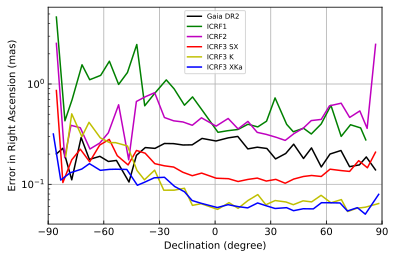

In [4]:
# Plot for median error
fig, ax = plt.subplots()

med_dec = np.arange(-90, 90, 5) + 2.5

ax.plot(gdr2_binned["dec"], gdr2_binned["ra_err"], "k-", ms=2, label="Gaia DR2")
ax.plot(icrf1_binned["dec"], icrf1_binned["ra_err"], "g-", ms=2, label="ICRF1")
ax.plot(icrf2_binned["dec"], icrf2_binned["ra_err"], "m-", ms=2, label="ICRF2")
ax.plot(icrf3sx_binned["dec"], icrf3sx_binned["ra_err"], "r-", ms=2, label="ICRF3 SX")
ax.plot(icrf3k_binned["dec"], icrf3k_binned["ra_err"], "y-", ms=2, label="ICRF3 K")
ax.plot(icrf3xka_binned["dec"], icrf3xka_binned["ra_err"], "b-", ms=2, label="ICRF3 XKa")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination (degree)")
ax.set_yscale("log")
ax.set_ylabel('Error in Right Ascension (mas)')
ax.grid()  
ax.legend(fontsize="x-small")

plt.savefig("../plots/raerr-vs-dec-binned.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


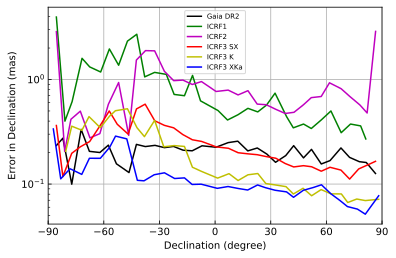

In [5]:
# Plot for median error
fig, ax = plt.subplots()

med_dec = np.arange(-90, 90, 5) + 2.5

ax.plot(gdr2_binned["dec"], gdr2_binned["dec_err"], "k-", ms=2, label="Gaia DR2")
ax.plot(icrf1_binned["dec"], icrf1_binned["dec_err"], "g-", ms=2, label="ICRF1")
ax.plot(icrf2_binned["dec"], icrf2_binned["dec_err"], "m-", ms=2, label="ICRF2")
ax.plot(icrf3sx_binned["dec"], icrf3sx_binned["dec_err"], "r-", ms=2, label="ICRF3 SX")
ax.plot(icrf3k_binned["dec"], icrf3k_binned["dec_err"], "y-", ms=2, label="ICRF3 K")
ax.plot(icrf3xka_binned["dec"], icrf3xka_binned["dec_err"], "b-", ms=2, label="ICRF3 XKa")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination (degree)")
ax.set_yscale("log")
ax.set_ylabel('Error in Declination (mas)')
ax.grid()  
ax.legend(fontsize="x-small")

plt.savefig("../plots/decerr-vs-dec-binned.eps")

Interestingly, if we look at the Gaia DR1 and DR2 solely, we find that they show very similar trend.

In [6]:
binsize = 20

# ICRF1
icrf1_dec_bin = np.trunc(np.arange(len(icrf1)) / binsize)
icrf1.sort("dec")
icrf1_grouped = icrf1.group_by(icrf1_dec_bin)
icrf1_binned = icrf1_grouped.groups.aggregate(np.median)

binsize = 50

# ICRF2
icrf2_dec_bin = np.trunc(np.arange(len(icrf2)) / binsize)
icrf2.sort("dec")
icrf2_grouped = icrf2.group_by(icrf2_dec_bin)
icrf2_binned = icrf2_grouped.groups.aggregate(np.median)

# ICRF3 SX
icrf3sx_dec_bin = np.trunc(np.arange(len(icrf3sx)) / binsize)
icrf3sx.sort("dec")
icrf3sx_grouped = icrf3sx.group_by(icrf3sx_dec_bin)
icrf3sx_binned = icrf3sx_grouped.groups.aggregate(np.median)

binsize = 20

# ICRF3 K
icrf3k_dec_bin = np.trunc(np.arange(len(icrf3k)) / binsize)
icrf3k.sort("dec")
icrf3k_grouped = icrf3k.group_by(icrf3k_dec_bin)
icrf3k_binned = icrf3k_grouped.groups.aggregate(np.median)

# ICRF3 XKa
icrf3xka_dec_bin = np.trunc(np.arange(len(icrf3xka)) / binsize)
icrf3xka.sort("dec")
icrf3xka_grouped = icrf3xka.group_by(icrf3xka_dec_bin)
icrf3xka_binned = icrf3xka_grouped.groups.aggregate(np.median)

binsize = 50

# Gaia DR1
gdr1_dec_bin = np.trunc(np.arange(len(gdr1)) / binsize)
gdr1.sort("dec")
gdr1_grouped = gdr1.group_by(gdr1_dec_bin)
gdr1_binned = gdr1_grouped.groups.aggregate(np.median)

# Gaia DR2
gdr2_dec_bin = np.trunc(np.arange(len(gdr2)) / binsize)
gdr2.sort("dec")
gdr2_grouped = gdr2.group_by(gdr2_dec_bin)
gdr2_binned = gdr2_grouped.groups.aggregate(np.median)

# Gaia DR2 Bright sources
gdr2bgt_dec_bin = np.trunc(np.arange(len(gdr2bgt)) / binsize)
gdr2bgt.sort("dec")
gdr2bgt_grouped = gdr2bgt.group_by(gdr2bgt_dec_bin)
gdr2bgt_binned = gdr2bgt_grouped.groups.aggregate(np.median)

/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the Mas

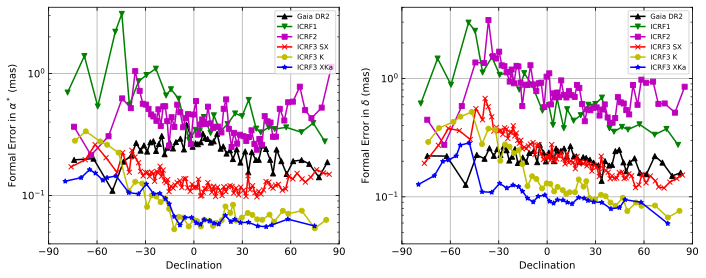

In [7]:
# Plot for median error
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

# Right ascension
ax0.plot(gdr2_binned["dec"], gdr2_binned["ra_err"], "k-^", ms=5, label="Gaia DR2")
ax0.plot(icrf1_binned["dec"], icrf1_binned["ra_err"], "g-v", ms=5, label="ICRF1")
ax0.plot(icrf2_binned["dec"], icrf2_binned["ra_err"], "m-s", ms=5, label="ICRF2")
ax0.plot(icrf3sx_binned["dec"], icrf3sx_binned["ra_err"], "r-x", ms=5, label="ICRF3 SX")
ax0.plot(icrf3k_binned["dec"], icrf3k_binned["ra_err"], "y-o", ms=5, label="ICRF3 K")
ax0.plot(icrf3xka_binned["dec"], icrf3xka_binned["ra_err"], "b-*", ms=5, label="ICRF3 XKa")

ax0.set_xlim([-90, 90])
ax0.set_ylim([0.04, 3.5])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlabel("Declination")
ax0.set_yscale("log")
ax0.set_ylabel("Formal Error in $\\alpha^*$ (mas)")
ax0.grid()  
ax0.legend(fontsize="x-small", loc="upper right")

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

# Declination
ax1.plot(gdr2_binned["dec"], gdr2_binned["dec_err"], "k-^", ms=5, label="Gaia DR2")
ax1.plot(icrf1_binned["dec"], icrf1_binned["dec_err"], "g-v", ms=5, label="ICRF1")
ax1.plot(icrf2_binned["dec"], icrf2_binned["dec_err"], "m-s", ms=5, label="ICRF2")
ax1.plot(icrf3sx_binned["dec"], icrf3sx_binned["dec_err"], "r-x", ms=5, label="ICRF3 SX")
ax1.plot(icrf3k_binned["dec"], icrf3k_binned["dec_err"], "y-o", ms=5, label="ICRF3 K")
ax1.plot(icrf3xka_binned["dec"], icrf3xka_binned["dec_err"], "b-*", ms=5, label="ICRF3 XKa")

ax1.set_xlim([-90, 90])
ax1.set_ylim([0.04, 4])
ax1.set_xticks(np.arange(-90, 91, 30))
ax1.set_xlabel("Declination")
ax1.set_yscale("log")
ax1.set_ylabel("Formal Error in $\\delta$ (mas)")
ax1.grid()  
ax1.legend(fontsize="x-small", loc="upper right")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.tight_layout()

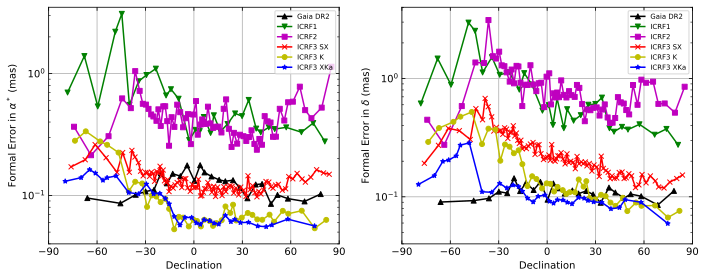

In [8]:
# Plot for median error
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

# Right ascension
ax0.plot(gdr2bgt_binned["dec"], gdr2bgt_binned["ra_err"], "k-^", ms=5, label="Gaia DR2")
ax0.plot(icrf1_binned["dec"], icrf1_binned["ra_err"], "g-v", ms=5, label="ICRF1")
ax0.plot(icrf2_binned["dec"], icrf2_binned["ra_err"], "m-s", ms=5, label="ICRF2")
ax0.plot(icrf3sx_binned["dec"], icrf3sx_binned["ra_err"], "r-x", ms=5, label="ICRF3 SX")
ax0.plot(icrf3k_binned["dec"], icrf3k_binned["ra_err"], "y-o", ms=5, label="ICRF3 K")
ax0.plot(icrf3xka_binned["dec"], icrf3xka_binned["ra_err"], "b-*", ms=5, label="ICRF3 XKa")

ax0.set_xlim([-90, 90])
ax0.set_ylim([0.04, 3.5])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlabel("Declination")
ax0.set_yscale("log")
ax0.set_ylabel("Formal Error in $\\alpha^*$ (mas)")
ax0.grid()  
ax0.legend(fontsize="x-small", loc="upper right")

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

# Declination
ax1.plot(gdr2bgt_binned["dec"], gdr2bgt_binned["dec_err"], "k-^", ms=5, label="Gaia DR2")
ax1.plot(icrf1_binned["dec"], icrf1_binned["dec_err"], "g-v", ms=5, label="ICRF1")
ax1.plot(icrf2_binned["dec"], icrf2_binned["dec_err"], "m-s", ms=5, label="ICRF2")
ax1.plot(icrf3sx_binned["dec"], icrf3sx_binned["dec_err"], "r-x", ms=5, label="ICRF3 SX")
ax1.plot(icrf3k_binned["dec"], icrf3k_binned["dec_err"], "y-o", ms=5, label="ICRF3 K")
ax1.plot(icrf3xka_binned["dec"], icrf3xka_binned["dec_err"], "b-*", ms=5, label="ICRF3 XKa")

ax1.set_xlim([-90, 90])
ax1.set_ylim([0.04, 4])
ax1.set_xticks(np.arange(-90, 91, 30))
ax1.set_xlabel("Declination")
ax1.set_yscale("log")
ax1.set_ylabel("Formal Error in $\\delta$ (mas)")
ax1.grid()  
ax1.legend(fontsize="x-small", loc="upper right")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.tight_layout()

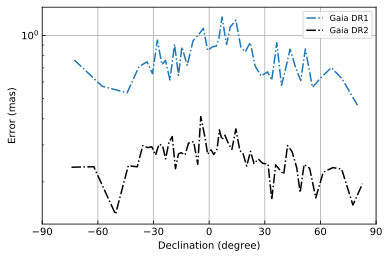

In [9]:
# Plot for median error
fig, ax = plt.subplots()

med_dec = np.arange(-90, 90, 5) + 2.5

ax.plot(gdr1_binned["dec"], gdr1_binned["pos_err"], "-.", ms=2, label="Gaia DR1")
ax.plot(gdr2_binned["dec"], gdr2_binned["pos_err"], "k-.", ms=2, label="Gaia DR2")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination (degree)")
ax.set_yscale("log")
ax.set_ylabel('Error (mas)')
ax.grid()  
ax.legend(fontsize="small")